In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('data/churn.csv')
df.head(10)

In [ ]:
df.info()

In [ ]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df.info()

In [ ]:
df.head()

In [ ]:
# churn=True means no longer active so has not taken a trip since 6/1/2014
df['churn'] = df['last_trip_date'] < '2014-06-01'



In [ ]:
def create_churn_col(df, last_trip, date):
    '''Inputs: df - current dataframe
               last_trip - string of last_trip datetime column
               date - date string to sort at for active versus not active user
        Creates a boolean column for if the user churned or not based on last trip
        Output: df with new churn column boolean'''
    df['churn'] = df[last_trip] < date
    return df
    

In [ ]:
create_churn_col(df, 'last_trip_date', '2014-06-01')
df.head()

In [ ]:
def bool_to_int(df, col_lst):
    '''Inputs: df - current dataframe
               col_lst - list of boolean columns
        Changes boolean values to 1 and 0 
        Output - df with new int columns'''
    for col in col_lst:
        df[col] = df[col].astype(int)
    return df

In [ ]:
bool_to_int(df, ['churn', 'luxury_car_user'])
df.head()

In [ ]:
df.info()

In [ ]:
sns.pairplot(df)

In [2]:
from clean import *

In [3]:
file = (input("Enter path of filename: "))
df1 = pd.read_csv(file)
df1 = to_date(df1)
df1 = create_churn_col(df1, 'last_trip_date', '2014-06-01')
df1 = bool_to_int(df1, ['churn', 'luxury_car_user'])
df1 = hot_encode(df1)
df1 = drop_nan_ratings(df1)


Enter path of filename: data/churn.csv


In [4]:
df1.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,0.0,2014-01-25,15.4,4,1,46.2,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,1.0,2014-01-29,0.0,0,0,50.0,1
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,0.0,2014-01-06,0.0,3,0,100.0,1
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,0.0,2014-01-10,20.0,9,1,80.0,0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,1.0,2014-01-27,11.8,14,0,82.4,1


In [5]:
file = (input("Enter path of filename: "))
df = pd.read_csv(file)
df = to_date(df)
df = create_churn_col(df, 'last_trip_date', '2014-06-01')
df = bool_to_int(df, ['churn', 'luxury_car_user'])
df = hot_encode(df)
df = drop_nan_ratings(df)

Enter path of filename: data/churn_train.csv


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33132 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   avg_dist                33132 non-null  float64       
 1   avg_rating_by_driver    33132 non-null  float64       
 2   avg_rating_of_driver    33132 non-null  float64       
 3   avg_surge               33132 non-null  float64       
 4   city                    33132 non-null  object        
 5   last_trip_date          33132 non-null  datetime64[ns]
 6   phone                   33132 non-null  float64       
 7   signup_date             33132 non-null  datetime64[ns]
 8   surge_pct               33132 non-null  float64       
 9   trips_in_first_30_days  33132 non-null  int64         
 10  luxury_car_user         33132 non-null  int64         
 11  weekday_pct             33132 non-null  float64       
 12  churn                   33132 non-null  int64 

In [7]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,6.94,5.0,5.0,1.0,Astapor,2014-05-03,1.0,2014-01-12,0.0,0,0,100.0,1
1,8.06,5.0,5.0,1.0,Astapor,2014-01-26,1.0,2014-01-25,0.0,2,1,0.0,1
6,4.87,4.7,4.0,1.0,Astapor,2014-04-21,1.0,2014-01-18,0.0,0,0,66.7,1
7,1.78,4.0,5.0,1.0,Winterfell,2014-01-12,0.0,2014-01-11,0.0,3,0,0.0,1
8,6.87,5.0,4.7,1.0,Astapor,2014-01-30,1.0,2014-01-01,0.0,3,0,66.7,1


In [8]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, confusion_matrix


import matplotlib.pyplot as plt
import seaborn as sns

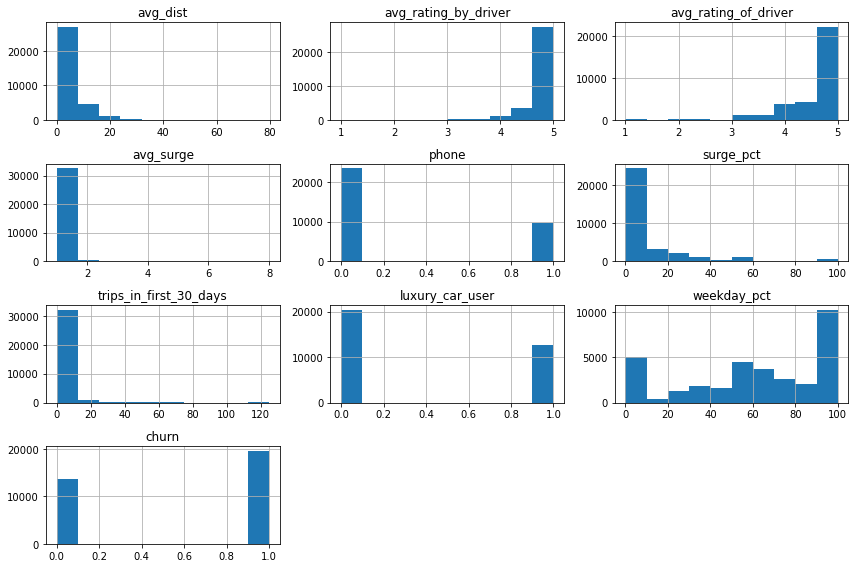

In [9]:
df.hist(figsize=(12,8))
plt.tight_layout();

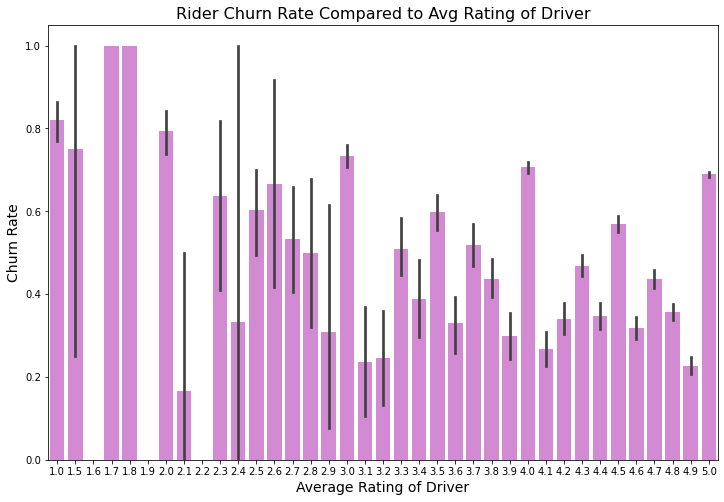

In [25]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x='avg_rating_of_driver', y='churn', data=df1, color='m', alpha=0.5)
ax.set_title('Rider Churn Rate Compared to Avg Rating of Driver', fontsize=16)
ax.set_xlabel('Average Rating of Driver', fontsize=14)
ax.set_ylabel('Churn Rate', fontsize=14);

In [11]:
#need to drop city due to it being a string
df.drop(columns=['city', 'last_trip_date', 'signup_date'], inplace=True)

y = df.pop('churn')
X = df

In [12]:
kf = KFold(n_splits=10, shuffle=True, random_state=33)
accuracy = []
precision = []
recall = []

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=33)

for train_idx, test_idx in kf.split(X_train):
    model = LogisticRegression(max_iter=500)
    model.fit(X_train.iloc[train_idx], y_train.iloc[train_idx])
    y_pred = model.predict(X_train.iloc[test_idx])
    y_true = y_train.iloc[test_idx]
    accuracy.append(accuracy_score(y_true, y_pred))
    precision.append(precision_score(y_true, y_pred))
    recall.append(recall_score(y_true, y_pred))
    mse = mean_squared_error(y_true, y_pred)


In [13]:
print('Average accuracy: {}'.format(np.mean(accuracy)))
print('Average precision: {}'.format(np.mean(precision)))
print('Average sensitivity: {}'.format(np.mean(recall)))

Average accuracy: 0.6725021141340798
Average precision: 0.690140944782355
Average sensitivity: 0.8071907866795357


In [14]:
print('Ave MSE: {}'.format(np.mean(mse)))

Ave MSE: 0.322463768115942


In [15]:
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[ 473  528]
 [ 273 1210]]


In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

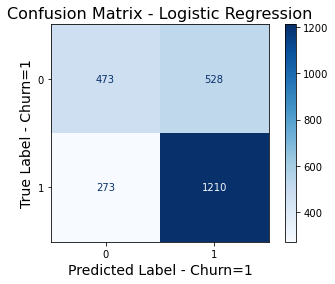

In [17]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
disp.im_
plt.title('Confusion Matrix - Logistic Regression', fontsize=16)
plt.xlabel('Predicted Label - Churn=1', fontsize=14)
plt.ylabel('True Label - Churn=1', fontsize=14);

In [18]:
for name, coef in zip(df.columns[1:], model.coef_[0]):
    print("{0}: {1:0.4f}".format(name, coef))

avg_rating_by_driver: 0.0345
avg_rating_of_driver: 0.1257
avg_surge: -0.0011
phone: 0.5629
surge_pct: 1.0876
trips_in_first_30_days: -0.0067
luxury_car_user: -0.1051
weekday_pct: -0.8486


In [19]:
for i, coef in enumerate(model.coef_[0]):
    print("beta{0}: {1:0.5f}".format(i + 1, np.exp(coef)))

beta1: 1.03514
beta2: 1.13400
beta3: 0.99889
beta4: 1.75581
beta5: 2.96722
beta6: 0.99333
beta7: 0.90023
beta8: 0.42800
beta9: 0.99965


In [20]:
model.predict_log_proba(X_test)

array([[-1.00078281, -0.45821985],
       [-1.90474979, -0.16117851],
       [-0.99237598, -0.46313905],
       ...,
       [-1.26867677, -0.33017696],
       [-0.59591123, -0.80086646],
       [-0.93389508, -0.49925924]])

In [21]:
model.score(X_test, y_test)

0.6815163588071954

In [22]:
model.predict_proba(X_test)

array([[0.36759157, 0.63240843],
       [0.14885988, 0.85114012],
       [0.37069488, 0.62930512],
       ...,
       [0.28120347, 0.71879653],
       [0.55106019, 0.44893981],
       [0.39301988, 0.60698012]])

In [28]:
from sklearn.metrics import plot_roc_curve

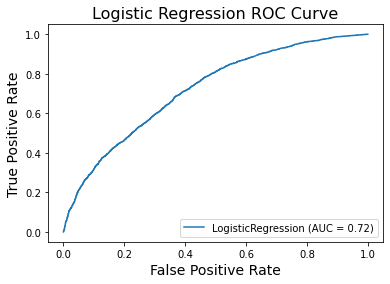

In [31]:
plot_roc_curve(model, X_test, y_test)
plt.title('Logistic Regression ROC Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14);  